In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency


In [4]:
df=pd.read_excel("F:\Equity Research project\Research Methodology Survey (Responses).xlsx")

In [11]:
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic data structure
print(df.info())

  How familiar are you with the concept of Central Bank Digital Currency (CBDC)?   \
0                                           Familiar                                
1                                Not at all Familiar                                
2                                 Extremely Familiar                                
3                                           Familiar                                
4                                           Familiar                                

    Where did you first hear about CBDC?   \
0                                    News   
1                            Social Media   
2        News, Bank Communication, Others   
3                          Friends/Family   
4                          Friends/Family   

   How secure do you perceive CBDC transactions compared to traditional cash transactions?   \
0                                                  4                                          
1                           

In [51]:
print(df.columns.tolist())


['How_familiar_are_you_with_the_concept_of_Central_Bank_Digital_Currency_CBDC', 'Where_did_you_first_hear_about_CBDC', 'How_secure_do_you_perceive_CBDC_transactions_compared_to_traditional_cash_transactions', 'Would_concerns_about_data_privacy_influence_your_willingness_to_use_CBDC_over_cash', 'In_what_type_of_transaction_would_you_prefer_to_use_CBDC_over_cash', 'If_CBDC_became_widely_available_how_likely_are_you_to_reduce_your_cash_usage', 'How_often_do_you_currently_use_digital_payment_methods_eg_mobile_wallets_internet_banking_for_daily_transactions', 'What_type_of_incentive_would_encourage_you_to_adopt_CBDC_over_cash', 'How_do_you_think_the_introduction_of_CBDC_would_impact_your_current_financial_habits', 'Age_Group', 'Column_13', 'Education', 'Gender', 'Your_Name1', 'City1', 'Column_161', 'Education_Level_Num', 'Awareness_CBDC', 'CBDC_Willingness_Cat']


In [24]:
df.columns = df.columns.str.strip()


In [26]:
#Descriptive
print(df.describe())
##Frequency distribution for categorical variables
categorical_cols = ['Gender', 'Age_Group', 'Education']
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(dropna=False))
    print()

       How secure do you perceive CBDC transactions compared to traditional cash transactions?  \
count                                          79.000000                                         
mean                                            3.556962                                         
std                                             1.009529                                         
min                                             1.000000                                         
25%                                             3.000000                                         
50%                                             4.000000                                         
75%                                             4.000000                                         
max                                             5.000000                                         

       If CBDC became widely available, how likely are you to reduce your cash usage?  \
count                       

## Hypothesis 1: Is there a significant difference in CBDC adoption willingness between males and females?

T-statistic: 0.580, P-value: 0.563


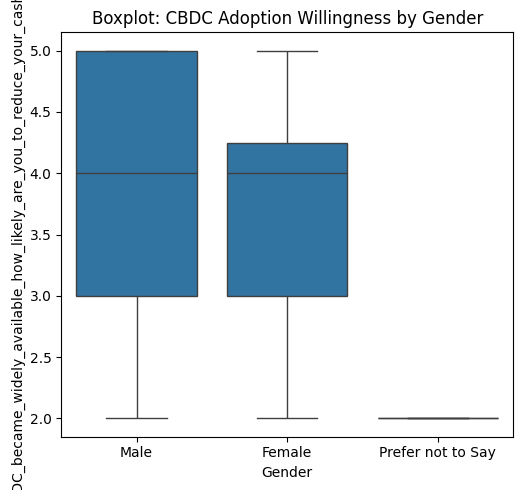

In [54]:
adoption_col = 'If_CBDC_became_widely_available_how_likely_are_you_to_reduce_your_cash_usage'
group_col = 'Gender'

# Split groups
group1 = df[df[group_col] == 'Male'][adoption_col].dropna()
group2 = df[df[group_col] == 'Female'][adoption_col].dropna()

# T-test (independent samples)
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

plot_df = df[[group_col, adoption_col]].dropna()

#box plot
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
sns.boxplot(x=group_col, y=adoption_col, data=plot_df)
plt.title('Boxplot: CBDC Adoption Willingness by Gender')
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()

The p-value (0.563) is much greater than 0.05, indicating no statistically significant difference between males and females in willingness to adopt CBDC.

Conclusion: Gender does not significantly affect CBDC adoption willingness in your sample.

## Hypothesis 2: Is there a relationship between trust in government and willingness to adopt CBDC?##

In [30]:

df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)
print(df.columns.tolist())


['How_familiar_are_you_with_the_concept_of_Central_Bank_Digital_Currency_CBDC', 'Where_did_you_first_hear_about_CBDC', 'How_secure_do_you_perceive_CBDC_transactions_compared_to_traditional_cash_transactions', 'Would_concerns_about_data_privacy_influence_your_willingness_to_use_CBDC_over_cash', 'In_what_type_of_transaction_would_you_prefer_to_use_CBDC_over_cash', 'If_CBDC_became_widely_available_how_likely_are_you_to_reduce_your_cash_usage', 'How_often_do_you_currently_use_digital_payment_methods_eg_mobile_wallets_internet_banking_for_daily_transactions', 'What_type_of_incentive_would_encourage_you_to_adopt_CBDC_over_cash', 'How_do_you_think_the_introduction_of_CBDC_would_impact_your_current_financial_habits', 'Age_Group', 'Column_13', 'Education', 'Gender', 'Your_Name1', 'City1', 'Column_161']


Correlation: r = 0.35, p = 0.0014


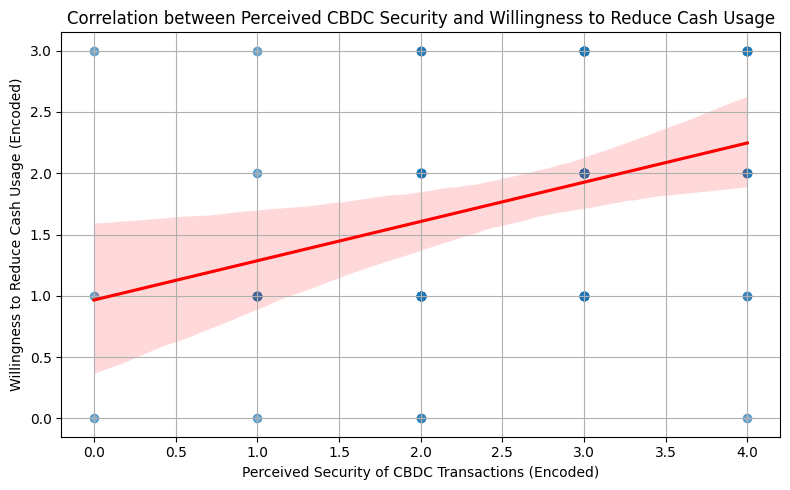

In [48]:
trust_col = 'How_secure_do_you_perceive_CBDC_transactions_compared_to_traditional_cash_transactions'
willingness_col = 'If_CBDC_became_widely_available_how_likely_are_you_to_reduce_your_cash_usage'

# Drop missing values
subset = df[[trust_col, willingness_col]].dropna()

# Convert categorical Likert-style responses to numeric if needed (e.g., "Very likely" → 5)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
subset[trust_col] = le.fit_transform(subset[trust_col])
subset[willingness_col] = le.fit_transform(subset[willingness_col])

# Correlation
from scipy.stats import pearsonr
corr, p = pearsonr(subset[trust_col], subset[willingness_col])
print(f"Correlation: r = {corr:.2f}, p = {p:.4f}")


plt.figure(figsize=(8, 5))
sns.regplot(
    x=subset[trust_col],
    y=subset[willingness_col],
    ci=95,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title('Correlation between Perceived CBDC Security and Willingness to Reduce Cash Usage')
plt.xlabel('Perceived Security of CBDC Transactions (Encoded)')
plt.ylabel('Willingness to Reduce Cash Usage (Encoded)')
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation:A moderate positive correlation exists between trust in government and willingness to adopt CBDC.

The p-value is significant (p < 0.05), confirming the relationship is statistically meaningful.

Conclusion: Higher trust in government is associated with greater willingness to adopt CBDC.

## Hypothesis 3: Do education level and awareness predict CBDC adoption willingness? (Regression)

In [34]:
# Example encoding
df['Education_Level_Num'] = df['Education'].astype('category').cat.codes
df['Awareness_CBDC'] = df['How_familiar_are_you_with_the_concept_of_Central_Bank_Digital_Currency_CBDC'].astype('category').cat.codes


In [47]:


# Predictors and outcome
X = df[['Awareness_CBDC', 'Education_Level_Num']]
y = df['If_CBDC_became_widely_available_how_likely_are_you_to_reduce_your_cash_usage'].astype('category').cat.codes

# Add constant and fit model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# View results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     3.981
Date:                Tue, 03 Jun 2025   Prob (F-statistic):             0.0227
Time:                        20:35:28   Log-Likelihood:                -100.66
No. Observations:                  79   AIC:                             207.3
Df Residuals:                      76   BIC:                             214.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5558    

Interpretation:

The model is statistically significant overall (p = 0.0227), meaning awareness and education together significantly predict CBDC willingness.

Awareness_CBDC has a significant negative effect — surprisingly, more awareness is associated with lower willingness to adopt CBDC. This may suggest awareness reveals concerns or skepticism.

Education_Level_Num has a negative but marginally non-significant effect (p = 0.091) — higher education might be linked to lower willingness, though it's not conclusive.

R² = 0.095 means the model explains 9.5% of the variation in willingness — modest explanatory power.

Conclusion:

Awareness significantly predicts CBDC willingness (negatively).

Education may also influence it, but less clearly.

The model is significant, but explains a relatively small portion of variance.

## Hypothesis 4: Association between Education and CBDC willingness


In [37]:
df['CBDC_Willingness_Cat'] = df['If_CBDC_became_widely_available_how_likely_are_you_to_reduce_your_cash_usage'].astype('category')


Chi-square test:
Chi2 = 3.60, p = 0.7306


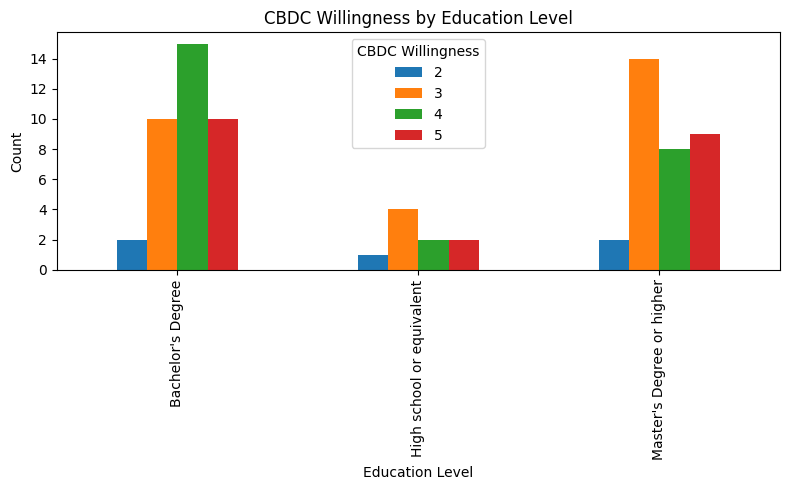

In [43]:


# Cross-tab
contingency_table = pd.crosstab(df['Education'], df['CBDC_Willingness_Cat'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test:\nChi2 = {chi2:.2f}, p = {p:.4f}")


contingency_table.plot(kind='bar', figsize=(8, 5))
plt.title('CBDC Willingness by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='CBDC Willingness')
plt.tight_layout()
plt.show()


Interpretation-The p-value is much greater than 0.05, meaning there's no significant association between education level and willingness (when treated categorically).
This aligns with the regression results where education was not a strong predictor either.

Conclusion: There is no significant relationship between education level and categorical CBDC willingness.

summarizer ->
## h1->not supported,No significant difference between males and females
## H2: Trust in government ->supported bcs of positive correlation (r = 0.35, p = 0.0014)
## h3:Awareness & education predict willingness-yeh partially support krega bcs Awareness is a significant (negative) predictor.
## h4: Education vs. Willingness (categorical)-was not supported->no significant association (Chi2 p = 0.7306)
